imports


In [25]:
import cv2
import os
import random
import zipfile
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter

utility functions


In [26]:
def showImage(img, shape, label, cmap='gray'):
    plt.subplot(3, 6, 1)
    plt.title(label)
    plt.imshow(img.reshape(shape), cmap=cmap)
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',
                    top='off', right='off', left='off', which='both')
    plt.show()

Load the dataset and then by using a pre-trained face detector, cropp the images to only focus on the faces and construct an entirely new dataset with just cropped faces


In [27]:
# def create_cropped_dataset(input_directory, output_directory):
#     # Create output directory if it doesn't exist
#     if not os.path.exists(output_directory):
#         os.makedirs(output_directory)

#     # Load the pre-trained face detector
#     face_cascade = cv2.CascadeClassifier(
#         cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#     # Iterate through each label subdirectory in the input directory
#     for label_name in os.listdir(input_directory):
#         label_path = os.path.join(output_directory, label_name)
#         os.makedirs(label_path, exist_ok=True)

#         count = 0

#         for filename in os.listdir(os.path.join(input_directory, label_name)):
#             if filename.endswith(('.jpg', '.jpeg', '.png')):
#                 # Read the image
#                 image_path = os.path.join(
#                     input_directory, label_name, filename)
#                 image = cv2.imread(image_path)
#                 # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#                 # Convert the image to grayscale
#                 gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#                 # Detect faces in the image
#                 faces = face_cascade.detectMultiScale(
#                     gray, scaleFactor=1.3, minNeighbors=5)

#                 # Process each detected face
#                 for i, (x, y, w, h) in enumerate(faces):
#                     face_roi = image[y:y+h, x:x+w]
#                     # if count == 0: showImage(face_roi, face_roi.shape, label="face")
#                     # Save each cropped face with a unique filename
#                  https://abf5-196-190-62-68.ngrok-free.app   output_path = os.path.join(label_path, f"{count+1}.jpg")
#                     cv2.imwrite(output_path, face_roi)
#                     count += 1


# # Example usage:
# input_directory = 'dataset'
# output_directory = 'cropped_dataset'
# create_cropped_dataset(input_directory, output_directory)

load the cropped dataset


In [28]:


def load_dataset(path, image_size):

    images = []
    labels = []

    for label_name in os.listdir(path):
        target_path = os.path.join(path, label_name)

        if len([f for f in os.listdir(target_path)]) > 1:
            for filename in os.listdir(target_path):
                file_path = os.path.join(target_path, filename)
                # image = Image.open(file_path)
                image = cv2.imread(file_path)
                image = cv2.resize(image, image_size)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                images.append(image)
                labels.append(label_name)

    return images, labels


path = 'cropped_dataset'
image_size = (100, 100)
dataset = load_dataset(path, image_size)

print(
    f"dataset length = {len(dataset[0])}, image shape = {dataset[0][0].shape}, first label = {dataset[1][0]}")

dataset length = 529, image shape = (100, 100), first label = Abdissa Degefu


Visualize some of the images in the dataset


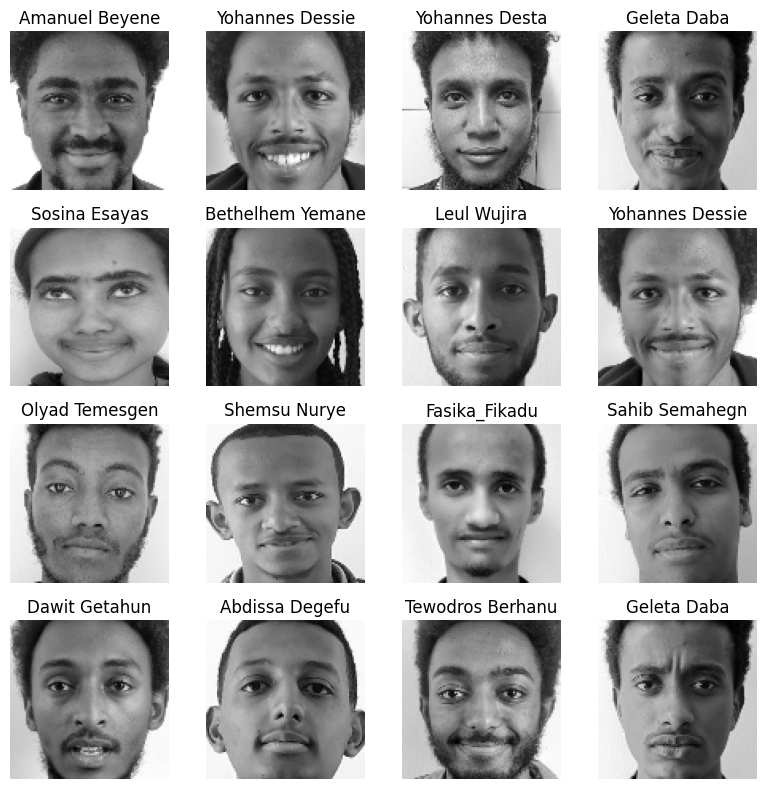

In [29]:
# randomly select indexes for visualization
random_integers = random.sample(range(1, 501), 16)
random_indexes = list(random_integers)


randomly_selected_images = [dataset[0][i] for i in random_indexes]
selected_labels = [dataset[1][i] for i in random_indexes]


fig, axes = plt.subplots(4, 4, figsize=(8, 8))
axes = axes.flatten()
for i in range(16):
    axes[i].imshow(randomly_selected_images[i], cmap='gray')
    axes[i].set_title(f"{selected_labels[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

shuffle the dataset, get a train-test split and perform one-hot encoding for the labels in the dataset


In [30]:
# ataset = load_dataset(path, image_size)
# images, labels = dataset

# images = np.array(images)
# labels = np.array(labels)

# # Shuffle the data
# shuffle_indices = np.random.permutation(len(images))
# images = images[shuffle_indices]
# labels = labels[shuffle_indices]

# # label encoding
# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(labels)

# # Create a mapping for encoded labels
# label_mapping = dict(
#     zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# new_dataset = (images.tolist(), encoded_labels.tolist())

# X_train, X_test, y_train, y_test = train_test_split(
#     images, encoded_labels, test_size=0.2, random_state=42)

# # Decode the labels back to their original form
# training_labels = label_encoder.inverse_transform(y_train)
# testing_labels = label_encoder.inverse_transform(y_test)

# print("Original Labels in Training Set:", training_labels[:5])
# print(f"Training Set Length: {len(y_train)}")
# print("Original Labels in Testing Set:", testing_labels[:5])
# print(f"Testing Set Length: {len(y_test)}")

# # print the label mapping
# print("Label Mapping:", label_mapping)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Assuming you have a dataset in the form of (images, labels)
# Replace this with your actual dataset loading code
dataset = load_dataset(path, image_size)
images, labels = dataset

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Shuffle the data
# np.random.seed(0)
# shuffle_indices = np.random.permutation(len(images))
# images = images[shuffle_indices]
# labels = labels[shuffle_indices]

# Categorical label encoding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# One-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
encoded_labels_onehot = onehot_encoder.fit_transform(
    encoded_labels.reshape(-1, 1))

# Store the one-hot encoded labels and mapping in the dataset
label_mapping = dict(zip(label_encoder.classes_, encoded_labels_onehot.T))
new_dataset = (images.tolist(), encoded_labels_onehot.tolist(), label_mapping)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    images, encoded_labels_onehot, test_size=0.2, random_state=42, stratify=encoded_labels_onehot)

# Decode the one-hot encoded labels back to their original form
training_labels = label_encoder.inverse_transform(np.argmax(y_train, axis=1))
testing_labels = label_encoder.inverse_transform(np.argmax(y_test, axis=1))

print("Original Labels in Training Set:")
print(training_labels[:5])
print(f"Training Set Length: {len(y_train)}")
print("Original Labels in Testing Set:")
print(testing_labels[:5])
print(f"Testing Set Length: {len(y_test)}")

# Print the label mapping
# print("Label Mapping:", label_mapping)

c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Original Labels in Training Set:
['Abraham Wendmeneh' 'Mariam Yohannes' 'Fasika_Fikadu' 'Betelhem Yimam'
 'Bethelhem Yemane']
Training Set Length: 423
Original Labels in Testing Set:
['Gelila Tefera' 'Fasika_Fikadu' 'Leul Wujira' 'Yonas Engedu'
 'Yanet Mekuria']
Testing Set Length: 106


visualize label distribution


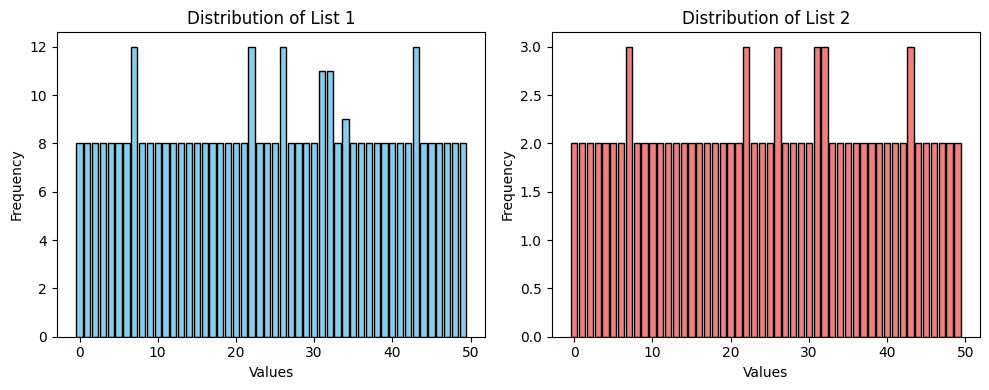

In [32]:

train_dict1 = Counter(training_labels.tolist())
test_dict2 = Counter(testing_labels.tolist())

unique_values = sorted(set(training_labels.tolist() + testing_labels.tolist()))


fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot for training labels
axs[0].bar([i for i, _ in enumerate(unique_values)], [train_dict1[val]
           for val in unique_values], color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of List 1')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')

# Plot for testing labels
axs[1].bar([i for i, _ in enumerate(unique_values)], [test_dict2[val]
           for val in unique_values], color='lightcoral', edgecolor='black')
axs[1].set_title('Distribution of List 2')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# print(unique_values)

In [33]:
faces = []
for face in X_train:
    faces.append(face.flatten())

faces = np.array(faces)
faces.shape

(423, 10000)

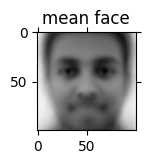

In [34]:
meanFace = faces.mean(axis=0)
showImage(meanFace, image_size, "mean face")

# zero centering the training set
faces = faces - meanFace

In [35]:
covariance = np.cov(faces)

# eigenDecomposition = np.linalg.eig(covariance)

# # transposed them beacuse the colunm correspond to a single eigen vector , so I want them to be reflected in a row
# eigenVectors = eigenDecomposition[1]
# eigenValues = eigenDecomposition[0]


# unsortedEigenValues = eigenValues.tolist()
# sortedEigenValues = eigenValues.tolist()
# sortedEigenValues.sort(reverse=True)
# performing general eigne decompsition on the covariance matrix
decompostion = np.linalg.svd(covariance)
U = decompostion[0]

# selecting k eigenvectors , where k = m and m is the number of images in the training set inorder to make our training set singular
eigenVectors = U[:, : faces.shape[0]]
print(f'Shape of selected eigenvectors : {eigenVectors.shape}')

Shape of selected eigenvectors : (423, 423)


In [36]:

# Compute the SVD
U, S, Vt = np.linalg.svd(covariance)

# Eigenvalues are the square of singular values
eigenValues = S**2

# Transpose U to have rows corresponding to eigenvectors
eigenVectors = U

# Sort eigenvalues and corresponding eigenvectors
# sorted_indices = np.argsort(eigenValues)[::-1]
# sortedEigenValues = eigenValues[sorted_indices]
# sortedEigenVectors = eigenVectors[sorted_indices]
unsortedEigenValues = eigenValues.tolist()
sortedEigenValues = eigenValues.tolist()
sortedEigenValues.sort(reverse=True)
eigenVectors.shape

(423, 423)

In [37]:
# total sum of the eigenvalues
sum = eigenValues.sum(0)

# sum of the eigenvalues upto a given index
priorSum = 0


# selected eigenVectors
selectedEigen = []


for eigenValue in sortedEigenValues:
    priorSum += eigenValue
    capturedVariance = (priorSum / sum)
    if capturedVariance >= 0.99:
        index = unsortedEigenValues.index(eigenValue)
        selectedEigen.append(eigenVectors[:, index])
        break

    index = unsortedEigenValues.index(eigenValue)
    selectedEigen.append(eigenVectors[:, index])

print("Kept eigenvectors: ", len(selectedEigen) / len(sortedEigenValues))

eigenVectors = np.array(selectedEigen)
print(eigenVectors.shape)

Kept eigenvectors:  0.04018912529550828
(17, 423)


(17, 10000)
(423, 10000)


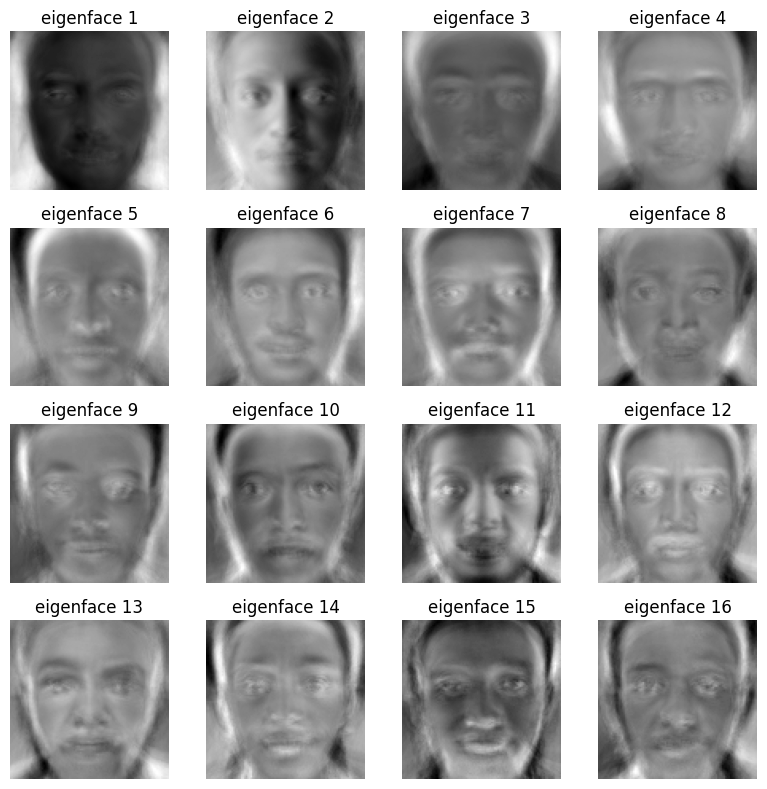

In [38]:
eigenSpace = eigenVectors.dot(faces)
print(eigenSpace.shape)
print(faces.shape)

# plot the first 16 eigenfaces
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
axes = axes.flatten()
for i, eigenFace in enumerate(eigenSpace[:16]):
    axes[i].imshow(eigenFace.reshape((100, 100)), cmap='gray')
    axes[i].set_title(f"eigenface {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

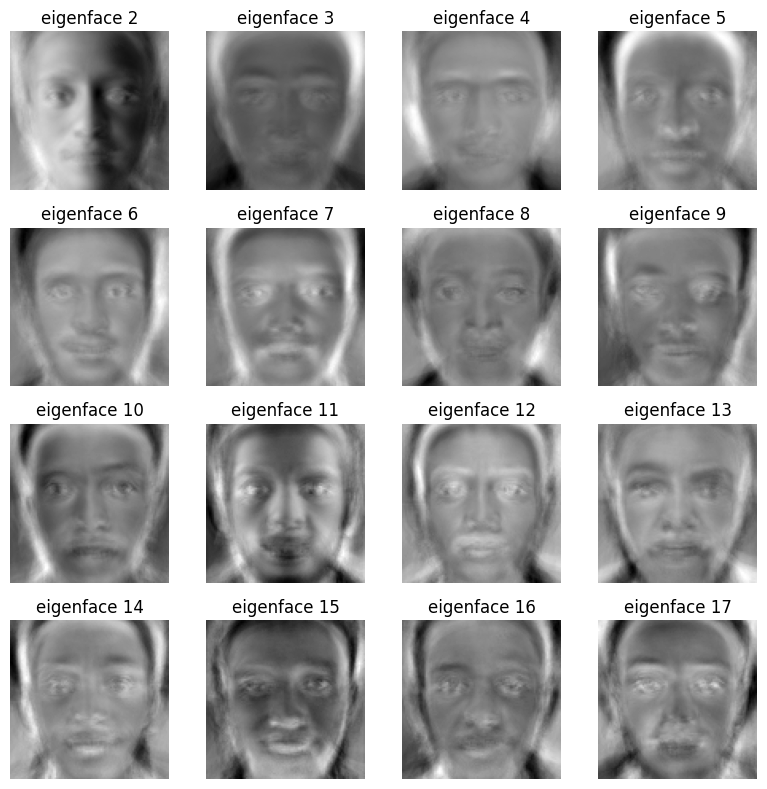

In [39]:
# plot the last 16 eigenfaces
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
axes = axes.flatten()
for i, eigenFace in enumerate(eigenSpace[len(eigenSpace)-16:]):
    axes[i].imshow(eigenFace.reshape((100, 100)), cmap='gray')
    axes[i].set_title(f"eigenface {len(eigenSpace) - 16 + i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Now lets project every face onto the face space , in other words calculate its weight in that space


In [40]:
projection = faces.dot(eigenSpace.transpose())
print(projection.shape)

(423, 17)


find threshold


In [41]:

max_dis = 0
for point in projection:
    difference = projection - point
    distance = np.linalg.norm(difference, axis=1)

    if max_dis < distance.max():
        max_dis = distance.max()

# then choose the max and divide it by two
threshold = max_dis * 0.5

print(f'Threshold : {threshold}')

Threshold : 258186603.6784348


test on test set


In [42]:
testFaces = []
for face in X_test:
    face = face.flatten()
    testFaces.append(face)

testFaces = np.array(testFaces)

# subtract mean face
testFaces = testFaces - meanFace

# project to the eigen space
testProjections = testFaces.dot(eigenSpace.transpose())
print(testProjections.shape)
print(eigenSpace.shape)

(106, 17)
(17, 10000)


In [43]:
testIndex = 0
correct = 0

for projected_test_face in testProjections:
    # calculate the distance the projection has from the training projection
    difference = projection - projected_test_face
    eucleadeanDistance = np.linalg.norm(difference, axis=1)
    shortestDistance = eucleadeanDistance.min()

    # dummy reconstruction error
    reconstruction_error = threshold * 2

    if shortestDistance >= reconstruction_error:
        predictedName = 'None Face'
    elif shortestDistance <= reconstruction_error and shortestDistance > threshold:
        predictedName = 'Unknown face'
    else:
        # the corresponding image with the shortest distance
        index = eucleadeanDistance.tolist().index(shortestDistance)
        predictedName = training_labels[index]
        actualName = testing_labels[testIndex]

    if predictedName == actualName:
        correct += 1

    testIndex += 1

print(f' Eigen Face Accuracy : {correct / (testIndex + 1)}')

 Eigen Face Accuracy : 0.8878504672897196


Tesing the eigenface on completely unseen faces of ourselves outside of the dataset.

- steps:- use the face detection library to crop out the faces, reshape that and test them on the eigenface algorithm.


In [44]:
# Load the pre-trained face detector
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

testset = []

for filename in os.listdir('TestImages'):
    if filename.endswith(('.jpg', '.jpeg', '.png')):

        image_path = os.path.join(
            'TestImages', filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Detect faces in the image
        faces = face_cascade.detectMultiScale(
            gray, scaleFactor=1.3, minNeighbors=5)

        # Process each detected face
        for i, (x, y, w, h) in enumerate(faces):
            face_roi = image[y:y+h, x:x+w]
            face_roi = cv2.resize(cv2.cvtColor(
                face_roi, cv2.COLOR_BGR2GRAY), image_size)
            testset.append(face_roi.flatten())
            # showImage(face_roi, face_roi.shape, label="face")
            # Save each cropped face with a unique filename
testset = np.array(testset)

In [45]:
testset = testset - meanFace
testsetProjection = testset.dot(eigenSpace.transpose())
testsetProjection.shape

(4, 17)

Husen Yusuf


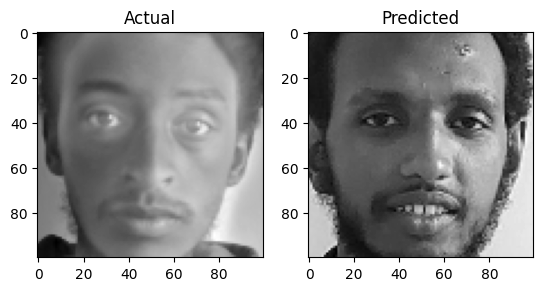

Metsakal Zeleke


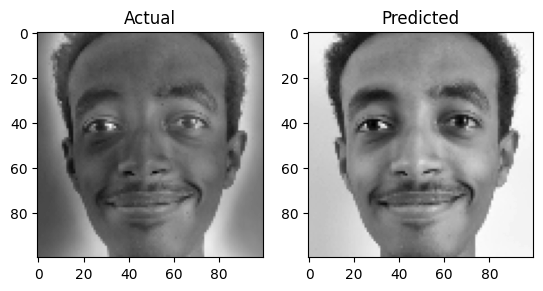

Sosina Esayas


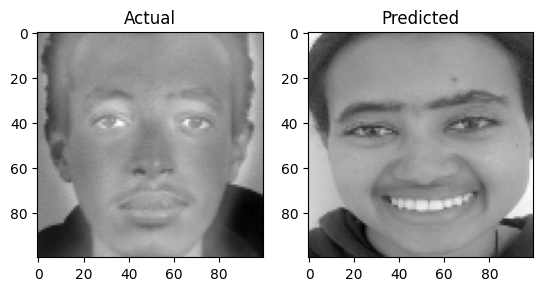

Tiruzer Tsedeke


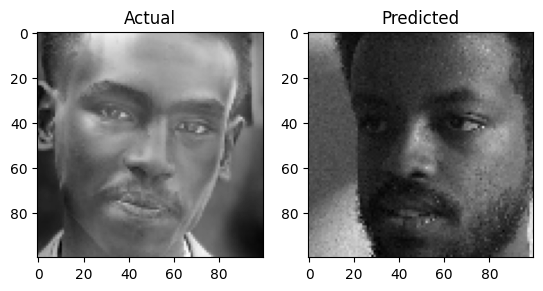

In [46]:
for i, projected_test_face in enumerate(testsetProjection):
    # calculate the distance the projection has from the training projection
    difference = projection - projected_test_face
    eucleadeanDistance = np.linalg.norm(difference, axis=1)
    shortestDistance = eucleadeanDistance.min()

    # dummy reconstruction error
    reconstruction_error = threshold * 2

    if shortestDistance >= reconstruction_error:
        predictedName = 'None Face'
    elif shortestDistance <= reconstruction_error and shortestDistance > threshold:
        predictedName = 'Unknown face'
    else:
        # the corresponding image with the shortest distance
        index = eucleadeanDistance.tolist().index(shortestDistance)
        predictedName = training_labels[index]
        # actualName = testing_labels[testIndex]
        print(predictedName)

        # showImage(X_train[index], image_size, 'predicted')
        plt.subplot(1, 2, 1)
        plt.imshow(testset[i].reshape(image_size), cmap='gray')
        plt.title('Actual')

        plt.subplot(1, 2, 2)
        plt.imshow(X_train[index].reshape(image_size), cmap='gray')
        plt.title('Predicted')

        plt.show()

In [47]:
# import numpy as np
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# # Load the Olivetti Faces dataset
# # faces_data = datasets.fetch_olivetti_faces(shuffle=True, random_state=42)
# # X, y = faces_data.data, faces_data.target

# # Split the data into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Perform PCA for feature extraction
# n_components = 100  # Adjust as needed
# pca = PCA(n_components=n_components, whiten=True).fit(X_train)
# X_train_pca = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)

# # Train an SVM classifier
# svm_classifier = SVC(kernel='linear', C=1.0)
# svm_classifier.fit(X_train_pca, y_train)

# # Predict on the test set
# y_pred = svm_classifier.predict(X_test_pca)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# # Example of using the trained SVM for face recognition


# def recognize_face(image):
#     # Preprocess the input image
#     image = pca.transform(image.reshape(1, -1))

#     # Use the trained SVM to predict the person's identity
#     predicted_label = svm_classifier.predict(image)

#     return predicted_label[0]


# # Example usage
# example_face_index = 0
# predicted_person = recognize_face(X_test[example_face_index])
# print(f"Predicted person: {predicted_person}")
# print(f"True person: {y_test[example_face_index]}")